In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()

In [3]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state = 1)

In [4]:
classifier = DecisionTreeClassifier()
classifier.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [5]:
y_train_predicted = classifier.predict(x_train)
y_test_predicted = classifier.predict(x_test)

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
confusion_matrix(y_train, y_train_predicted)

array([[37,  0,  0],
       [ 0, 34,  0],
       [ 0,  0, 41]])

In [14]:
confusion_matrix(y_test, y_test_predicted)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [19]:
classifier.score(x_test, y_test)

0.9736842105263158

In [25]:
#to get the visualisation of decision tree
import pydotplus
dot_data = export_graphviz(classifier, out_file=None, 
                           feature_names=iris.feature_names, 
                           class_names=iris.target_names,
                           filled = True, 
                           rounded = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf("iris.pdf")

True

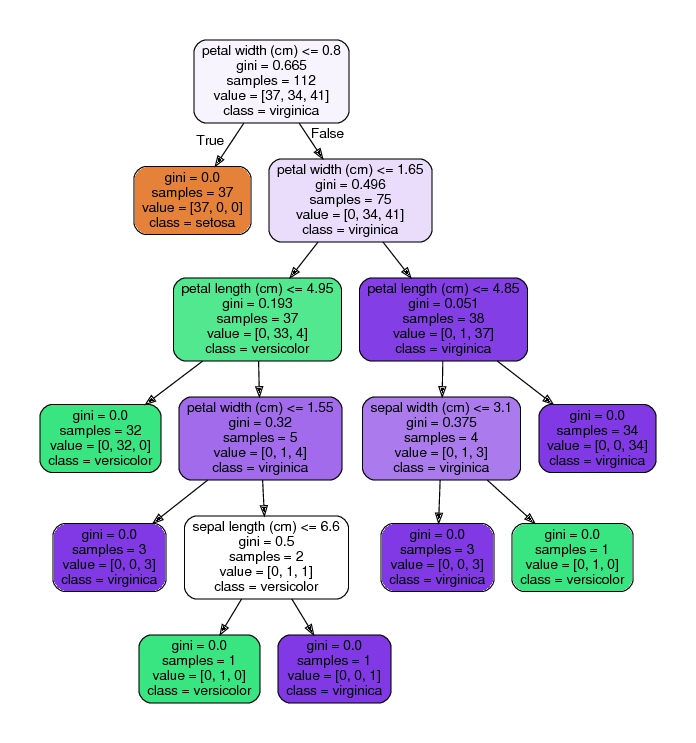

In [26]:
from wand.image import Image
img = Image(filename="iris.pdf")
img